In [1]:
from src.dl.inference.inferer import Inferer
import src.dl.lightning as lightning
from src.config import CONFIG

In [2]:
lightning_model = lightning.SegModel.from_experiment(name="testi", version="dense_ws_gn_full_preact")

inferer = Inferer(
    lightning_model,
    dataset="pannuke",
    patch_size=(256, 256),
    stride_size=80,
    fn_pattern="*",
    data_fold="test",
    model_weights="last",
    apply_weights=False,
    post_proc_method="cellpose",
    batch_size=1,
    num_workers=1,
    model_batch_size=1
)

In [3]:
# lightning_model

In [4]:
inferer.run_inference()

Inference: /home/local/leos/Dippa/datasets/data/pannuke/test/images: 100%|██████████| 2722/2722 [04:14<00:00, 10.71batch/s, patches=2722/2722]


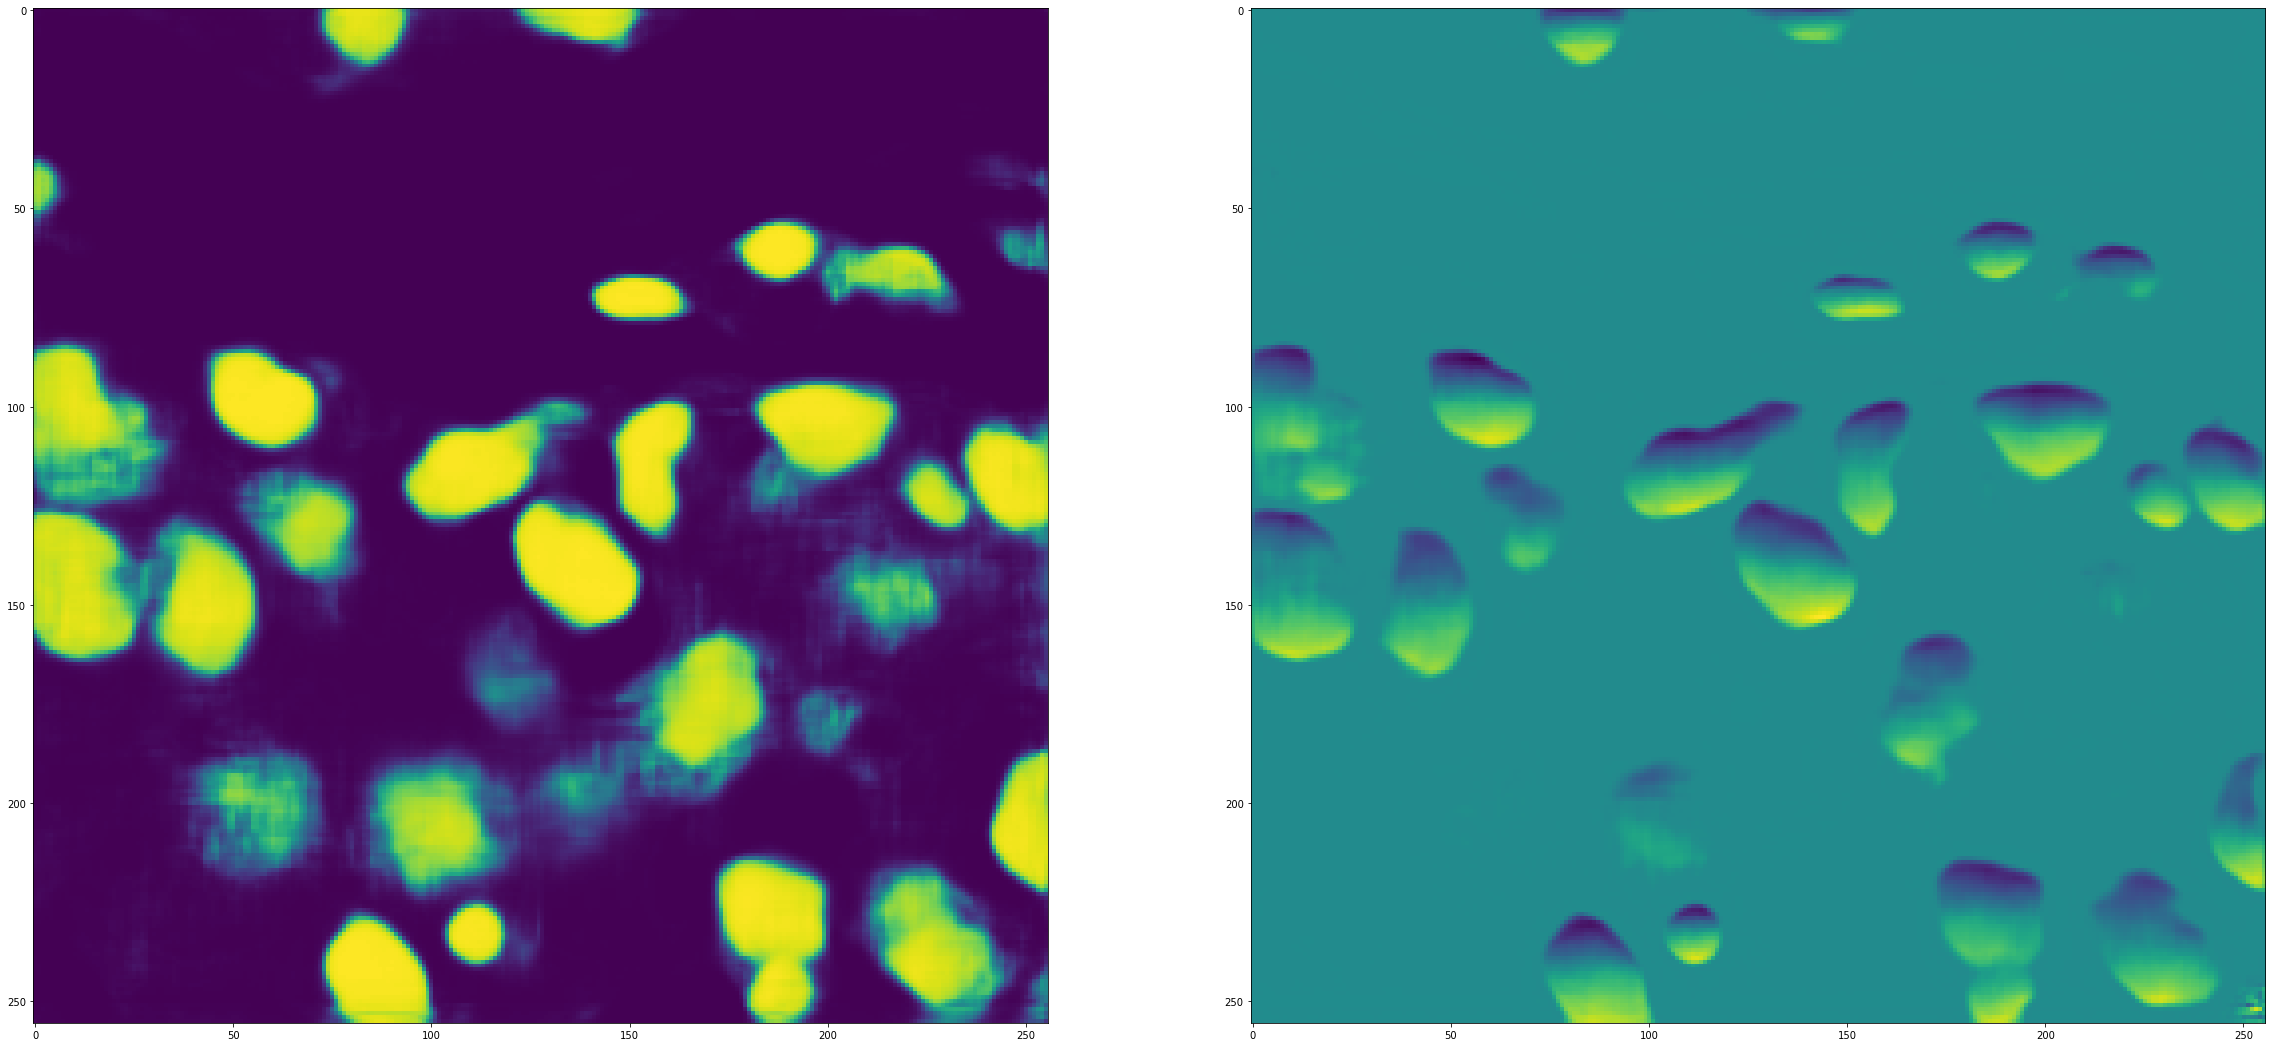

In [5]:
import matplotlib.pyplot as plt 
from skimage.color import label2rgb

key = "Breast_fold3_420"
# key = "test_11"
# key="TCGA-2Z-A9J9-01A-01-TS1"
fig, ax = plt.subplots(1, 2, figsize=(40, 40))
ax[0].imshow(inferer.soft_insts[key][..., 1])
ax[1].imshow(inferer.aux_maps[key][..., 1])
# ax[1].imshow(label2rgb(inferer.inst_maps[key], bg_label=0))

In [6]:
inferer.post_process()

  0%|          | 0/2722 [00:00<?, ?it/s]/home/local/leos/Dippa/DippaEnv/lib/python3.6/site-packages/torch/nn/functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
  0%|          | 13/2722 [00:01<03:15, 13.84it/s]/home/local/leos/Dippa/src/utils/img_utils.py:61: RuntimeWarning: divide by zero encountered in true_divide
  normed = np.clip((im / colmax), a_min=a_min, a_max=a_max)
/home/local/leos/Dippa/src/utils/img_utils.py:61: RuntimeWarning: invalid value encountered in true_divide
  normed = np.clip((im / colmax), a_min=a_min, a_max=a_max)
100%|██████████| 2722/2722 [04:12<00:00, 10.77it/s]


In [7]:
pattern_list = None
binary_scores = inferer.benchmark_insts(pattern_list=pattern_list, file_prefix="kumar_cellpose_swish")
binary_scores

Runnning metrics: 100%|██████████| 14/14 [00:57<00:00,  4.14s/it]


,AJI,AJI_plus,DICE2,PQ,SQ,DQ,inst_recall,inst_precision,splits,merges
name,,,,,,,,,,
TCGA-2Z-A9J9-01A-01-TS1,0.644536,0.654973,0.747178,0.633636,0.758122,0.835796,0.885217,0.791602,1.074257,0.515051
TCGA-44-2665-01B-06-BS6,0.693984,0.718394,0.716191,0.709329,0.794255,0.893074,0.898533,0.887681,0.719898,0.736119
TCGA-69-7764-01A-01-TS1,0.671235,0.674774,0.765457,0.643620,0.783018,0.821974,0.916100,0.745387,0.705634,0.618299
TCGA-A6-6782-01A-01-BS1,0.615620,0.640052,0.747649,0.614376,0.748192,0.821147,0.827664,0.814732,0.605744,0.475734
TCGA-AC-A2FO-01A-01-TS1,0.602552,0.605665,0.751684,0.584666,0.717855,0.814462,0.821497,0.807547,0.679320,1.170339
TCGA-AO-A0J2-01A-01-BSA,0.648162,0.666838,0.773386,0.605335,0.761447,0.794979,0.800562,0.789474,0.713363,0.698752
TCGA-CU-A0YN-01A-02-BSB,0.648499,0.656921,0.794674,0.667559,0.772103,0.864598,0.905465,0.827260,1.095621,0.592219
TCGA-EJ-A46H-01A-03-TSC,0.687240,0.694346,0.809522,0.672584,0.775317,0.867495,0.899142,0.838000,0.580798,0.416323
TCGA-FG-A4MU-01B-01-TS1,0.688665,0.708801,0.770135,0.668236,0.783925,0.852423,0.832258,0.873589,0.636726,0.552362


In [8]:
pattern_list = None
type_scores = inferer.benchmark_types(pattern_list=pattern_list, file_prefix="cellpose_swish")
type_scores = type_scores[type_scores.index.str.contains("avg")]
type_scores

Running metrics for epithelial: 100%|██████████| 2722/2722 [00:10<00:00, 267.01it/s]


,AJI,AJI_plus,DICE2,PQ,SQ,DQ,inst_recall,inst_precision,splits,merges
name,,,,,,,,,,
neoplastic_avg_for_the_set,0.566376,0.583768,0.725673,0.547161,0.781370,0.648359,0.646645,0.688175,0.320618,0.359999
inflammatory_avg_for_the_set,0.319065,0.321950,0.556191,0.356358,0.531053,0.422565,0.425837,0.480948,0.089417,0.118989
connective_avg_for_the_set,0.370084,0.373035,0.647051,0.372687,0.628665,0.462492,0.476395,0.510393,0.138426,0.181070
dead_avg_for_the_set,0.116120,0.118329,0.283840,0.114352,0.280536,0.149065,0.180575,0.185921,0.160773,0.137662
epithelial_avg_for_the_set,0.572461,0.584722,0.694049,0.558805,0.756978,0.682887,0.684017,0.710353,0.270843,0.302256


In [9]:
type_scores[type_scores.index.str.contains("for_the")].mean()

AJI               0.388821
AJI_plus          0.396361
DICE2             0.581361
PQ                0.389873
SQ                0.595720
DQ                0.473073
inst_recall       0.482694
inst_precision    0.515158
splits            0.196015
merges            0.219995
dtype: float64